In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import random

# Base directories in this environment
base_dir = "D:/distortion_data"
orig_dir = os.path.join(base_dir, "Kaggle_Images4k_dataset")
radial_dir = os.path.join(base_dir, "Kaggle_Images4k_radial_distortion")
random_dir = os.path.join(base_dir, "Kaggle_Images4k_random_field")


In [21]:
# List of original images
orig_images = [f for f in os.listdir(orig_dir) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
if not orig_images:
    raise FileNotFoundError("No original images found in Kaggle_Images4k_dataset")

# Pick a random sample
sample_name = random.choice(orig_images)
base_name = os.path.splitext(sample_name)[0]

# Paths for radial distortion
radial_distorted_path = os.path.join(radial_dir, "distorted", f"{base_name}_radial_distortion.png")
radial_grid_path      = os.path.join(radial_dir, "grid",      f"{base_name}_grid_radial_distortion.png")
radial_uv_path        = os.path.join(radial_dir, "uv_maps",   f"{base_name}_uv_map.npy")

# Paths for random-field distortion
rand_distorted_path = os.path.join(random_dir, "distorted", f"{base_name}_random_field.png")
rand_grid_path      = os.path.join(random_dir, "grid",      f"{base_name}_grid_random_field.png")
rand_uv_path        = os.path.join(random_dir, "uv_maps",   f"{base_name}_uv_map.npy")

In [22]:
# Load images and UV maps
orig_img = np.array(Image.open(os.path.join(orig_dir, sample_name)).convert("RGB"))
radial_img = np.array(Image.open(radial_distorted_path).convert("RGB"))
radial_grid = np.array(Image.open(radial_grid_path).convert("RGB"))
radial_uv = np.load(radial_uv_path)

rand_img = np.array(Image.open(rand_distorted_path).convert("RGB"))
rand_grid = np.array(Image.open(rand_grid_path).convert("RGB"))
rand_uv = np.load(rand_uv_path)



In [23]:

# Function to display sample
def show_sample(dist_img, grid_img, uv_map, title_prefix):
    # UV magnitude
    mag = np.sqrt(uv_map[...,0]**2 + uv_map[...,1]**2)
    mag_norm = (mag - mag.min()) / (mag.max() - mag.min() + 1e-8)

    fig, axes = plt.subplots(1, 3, figsize=(15,5))
    axes[0].imshow(dist_img.astype(np.uint8))
    axes[0].set_title(f"{title_prefix} Distorted")
    axes[0].axis('off')
    
    axes[1].imshow(grid_img.astype(np.uint8))
    axes[1].set_title(f"{title_prefix} Grid")
    axes[1].axis('off')
    
    im = axes[2].imshow(mag_norm, cmap='plasma')
    axes[2].set_title(f"{title_prefix} UV magnitude")
    axes[2].axis('off')
    fig.colorbar(im, ax=axes[2], fraction=0.046, pad=0.04)
    plt.show()


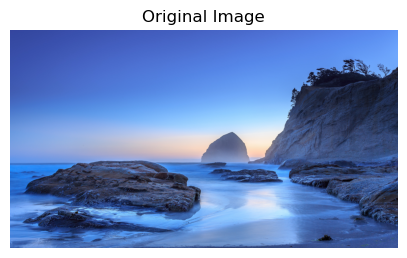

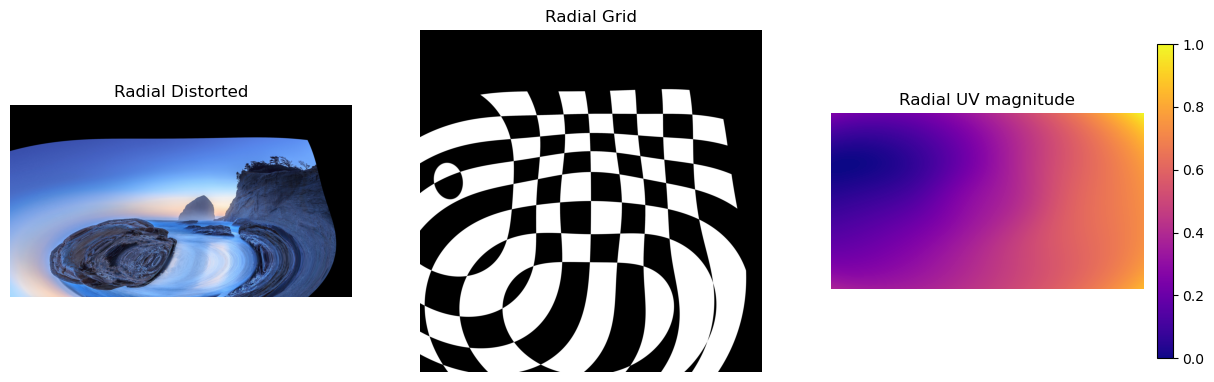

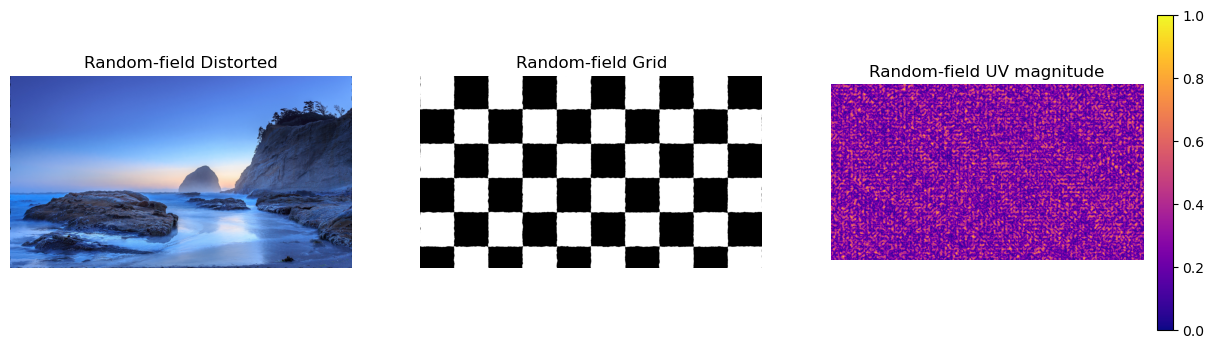

In [24]:

# Show original, radial sample, random-field sample
plt.figure(figsize=(5,5))
plt.imshow(orig_img.astype(np.uint8))
plt.title("Original Image")
plt.axis('off')
plt.show()

show_sample(radial_img, radial_grid, radial_uv, "Radial")
show_sample(rand_img, rand_grid, rand_uv, "Random-field")